In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.simplefilter("ignore")

In [40]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Unnamed: 0,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,19571,99166,Male,21.0,Srinagar,Student,5.0,0.0,5.58,5.0,0.0,Less than 5 hours,Unhealthy,BA,No,0.0,4.0,Yes,0
1,12078,60984,Male,18.0,Agra,Student,5.0,0.0,6.08,4.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,7.0,5.0,No,1
2,26427,133327,Male,18.0,Ghaziabad,Student,4.0,0.0,7.77,4.0,0.0,5-6 hours,Healthy,Class 12,Yes,11.0,4.0,No,1
3,21881,110495,Male,29.0,Visakhapatnam,Student,3.0,0.0,7.48,1.0,0.0,More than 8 hours,Moderate,MCA,No,12.0,5.0,Yes,1
4,12049,60838,Male,33.0,Hyderabad,Student,4.0,0.0,8.52,4.0,0.0,7-8 hours,Healthy,B.Tech,Yes,6.0,3.0,No,1


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'City', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                               0
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
df.shape

(19530, 19)

## 1.Drop Null

In [41]:
df.dropna(axis=0, inplace=True)

In [9]:
df.shape

(19527, 19)

## 2.Drop useless Columns

In [42]:
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)

In [11]:
df.shape

(19527, 17)

In [12]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [13]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [14]:
categorical_cols = [
    "Gender", "City", "Profession", "Dietary Habits", "Degree",
    "Have you ever had suicidal thoughts ?", "Sleep Duration", "Family History of Mental Illness"
]

In [13]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     ----------- --------------------------- 30.7/104.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  102.4/104.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.2/8.1 MB 2.6 MB/s eta 0:00:03
   - ----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 1. Univariate Analysis for Categorical Features
def univariate_categorical(df, categorical_cols):
    print("📊 Univariate Analysis - Categorical:")
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, palette="Set2")
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

📊 Univariate Analysis - Categorical:


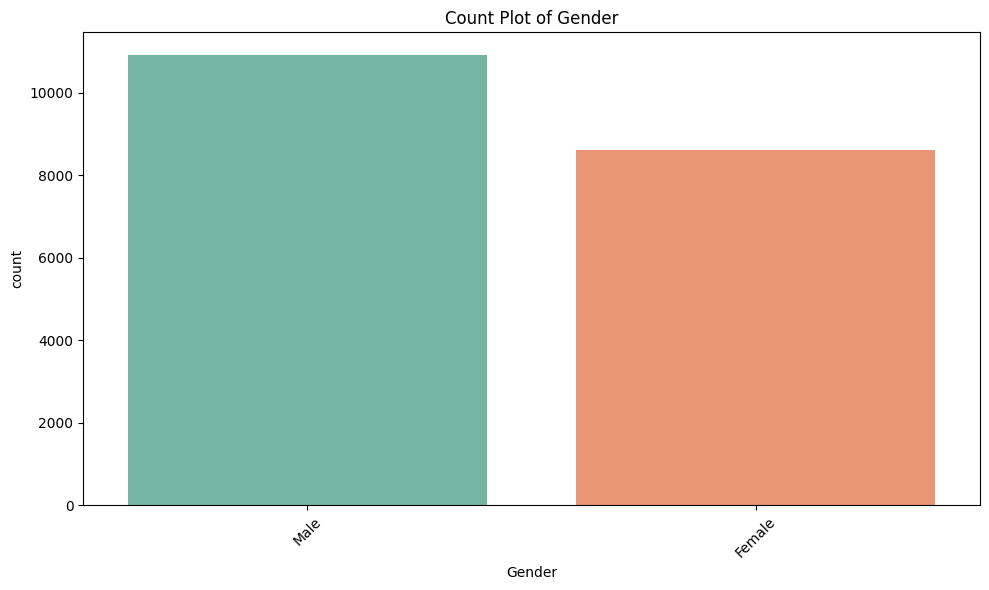

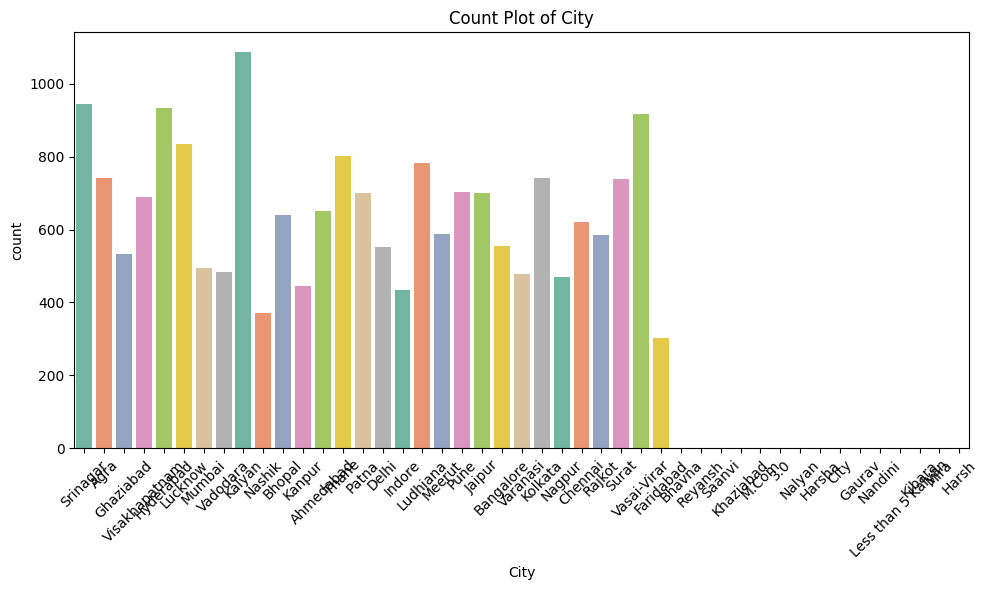

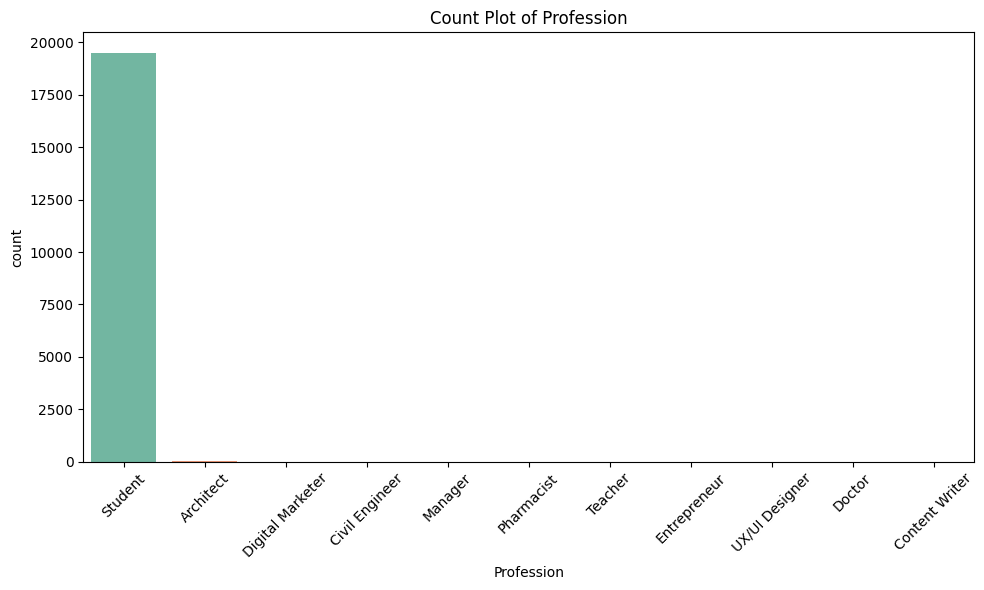

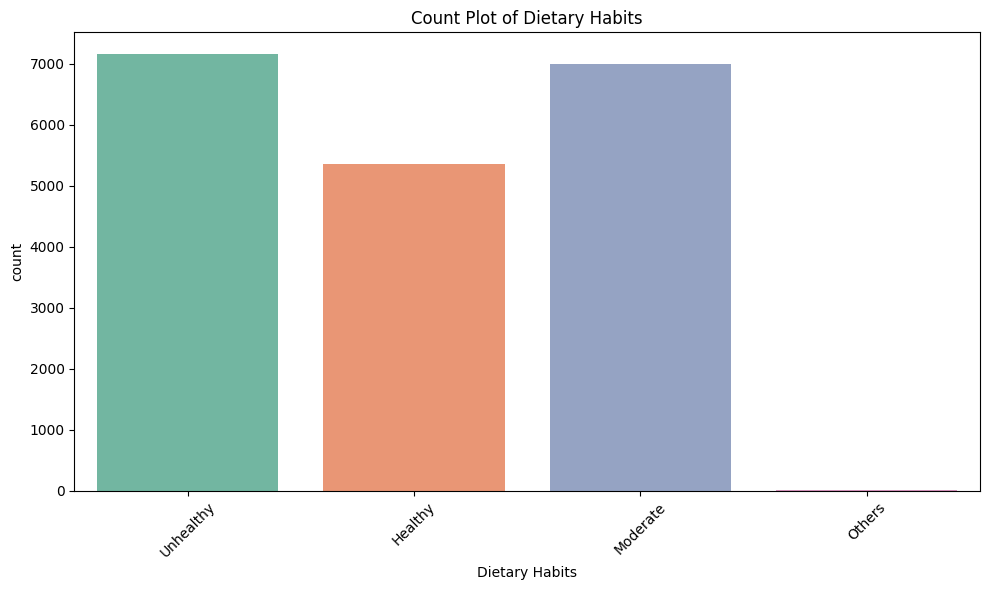

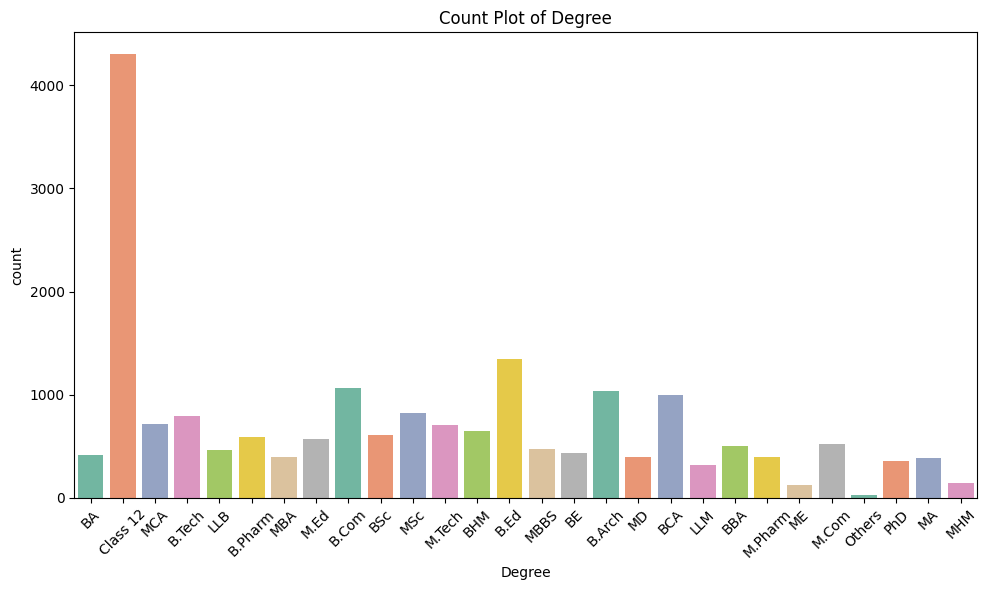

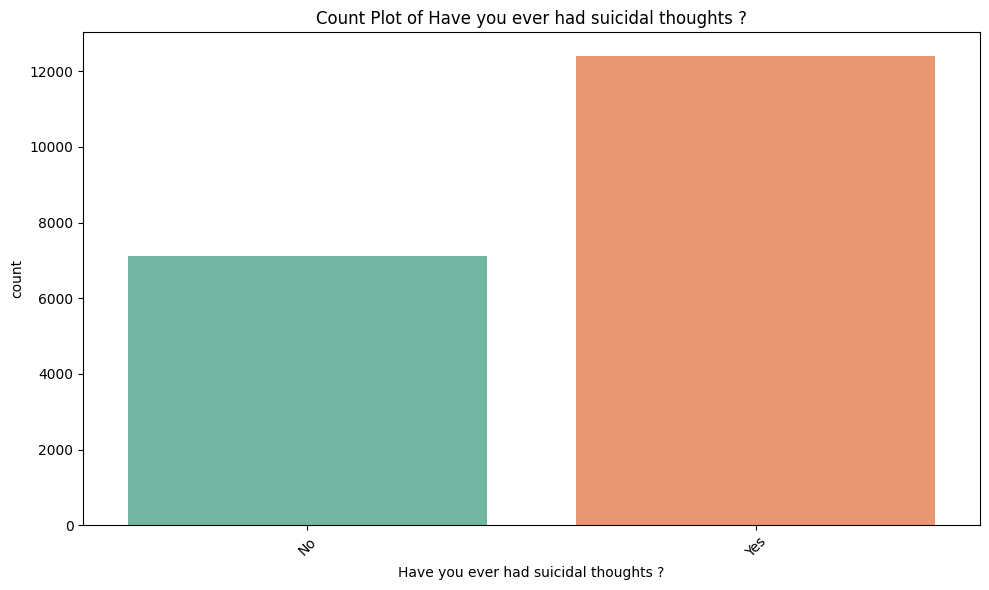

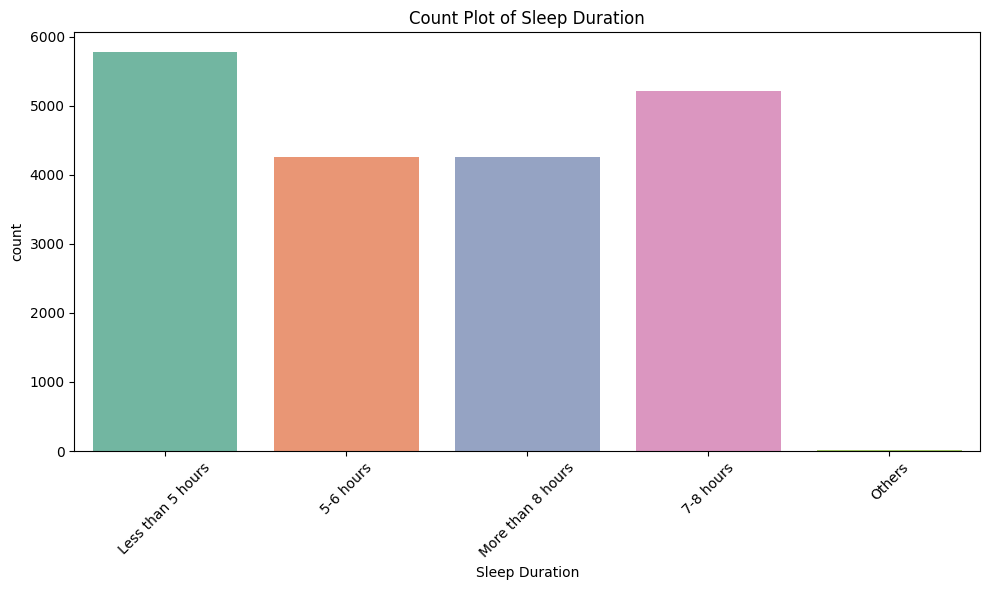

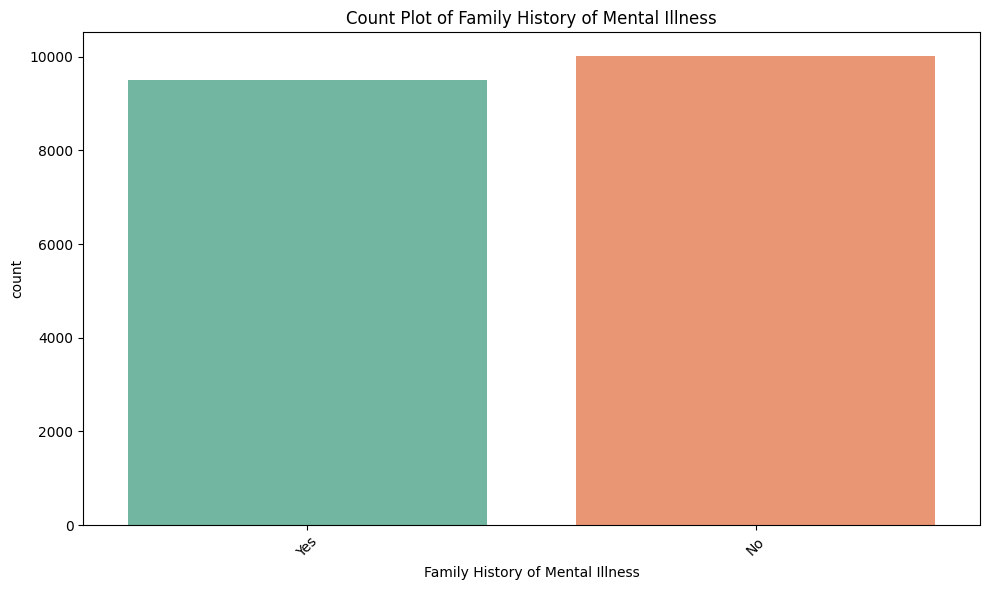

In [17]:
univariate_categorical(df, categorical_cols)

In [18]:
numerical_cols = [
    "Age", "Academic Pressure", "Work Pressure", "CGPA",
    "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", "Financial Stress"
]

target_col = "Depression"

In [19]:
# 2. Univariate Analysis for Numerical Features
def univariate_numerical(df, numerical_cols):
    print("📈 Univariate Analysis - Numerical:")
    for col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

📈 Univariate Analysis - Numerical:


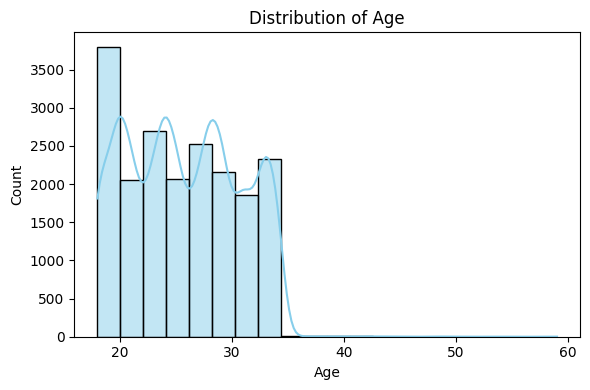

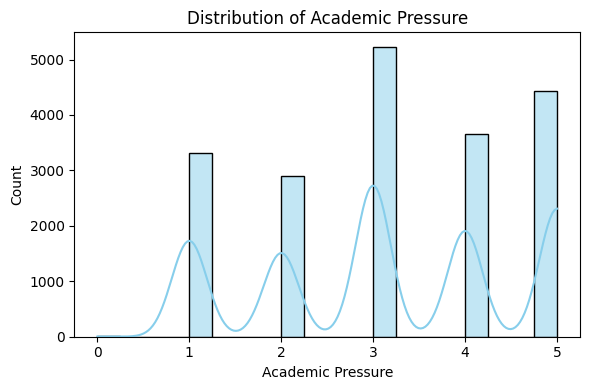

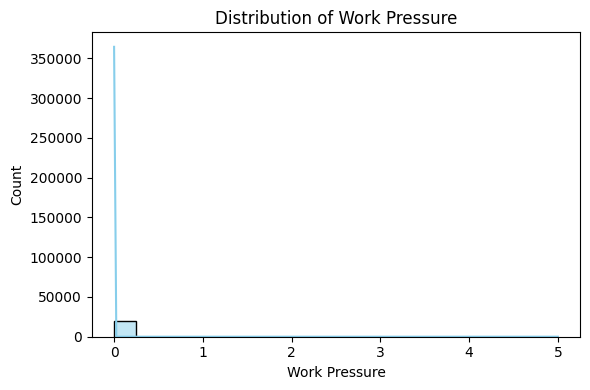

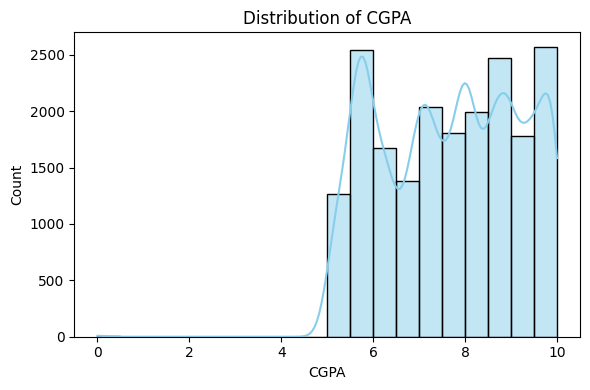

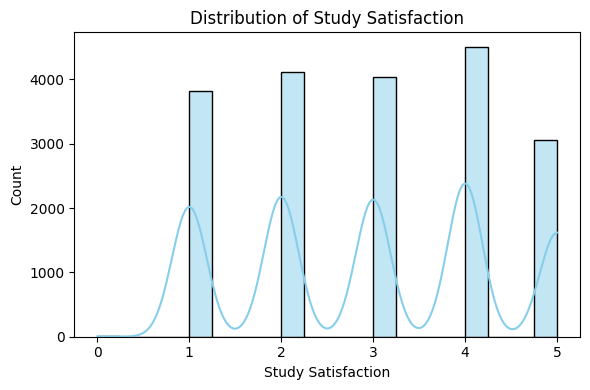

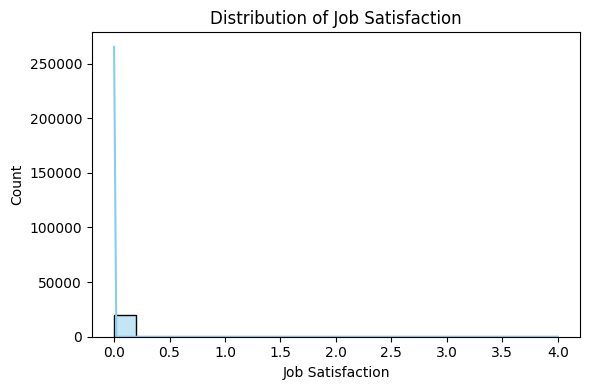

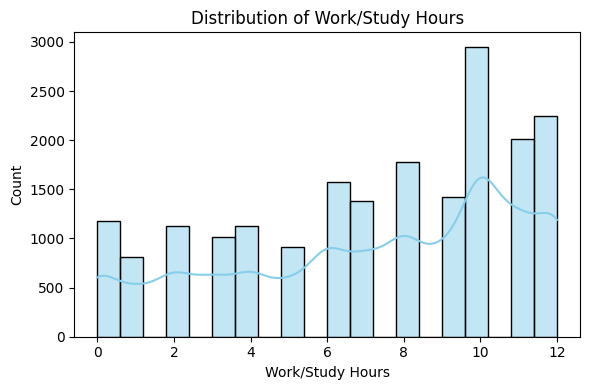

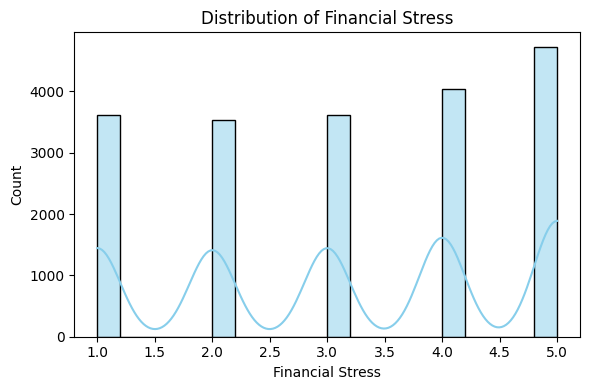

In [20]:
univariate_numerical(df, numerical_cols)

In [31]:
# Map the target column for better visualization
df["Depression_Label"] = df["Depression"].map({0: "Not Depressed", 1: "Depressed"})


In [21]:
def bivariate_categorical_target(df, categorical_cols, target_col="Depression_Label"):
    print("🔁 Bivariate Analysis - Categorical vs Target (Depression):")
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')
        cross_tab[["Not Depressed", "Depressed"]].plot(
            kind='bar',
            stacked=True,
            color=["#4C72B0", "#DD8452"],  # blue and orange
            figsize=(10, 8)
        )
        plt.title(f'{col} vs Depression')
        plt.ylabel("Proportion")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


🔁 Bivariate Analysis - Categorical vs Target (Depression):


<Figure size 1000x600 with 0 Axes>

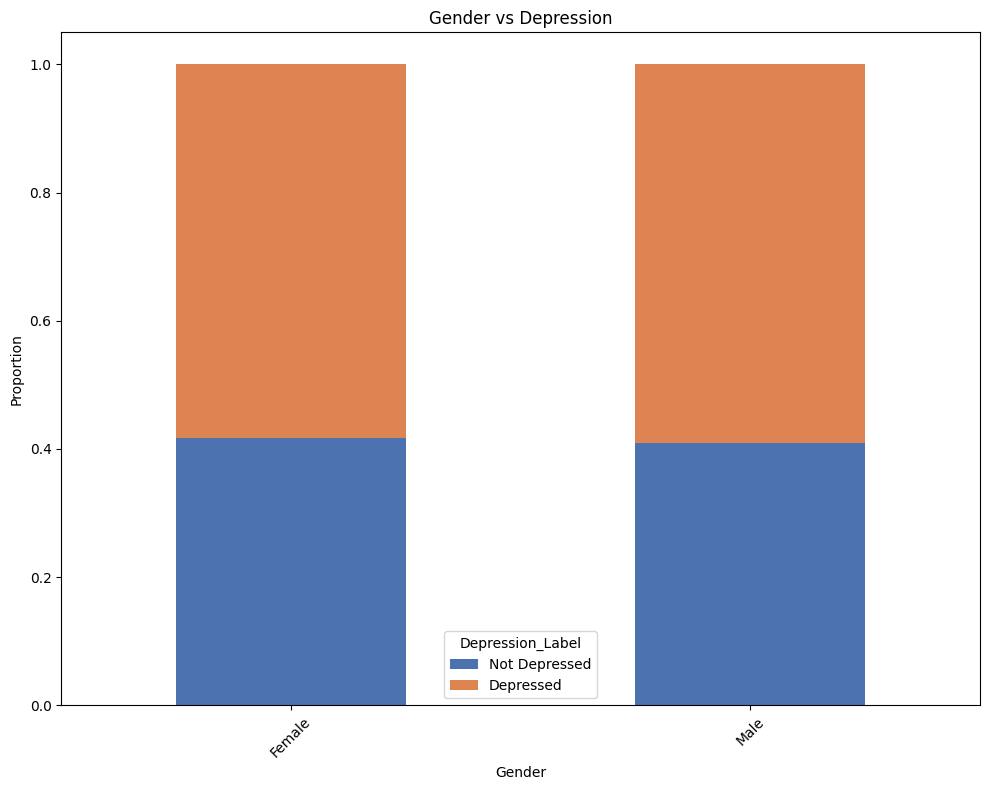

<Figure size 1000x600 with 0 Axes>

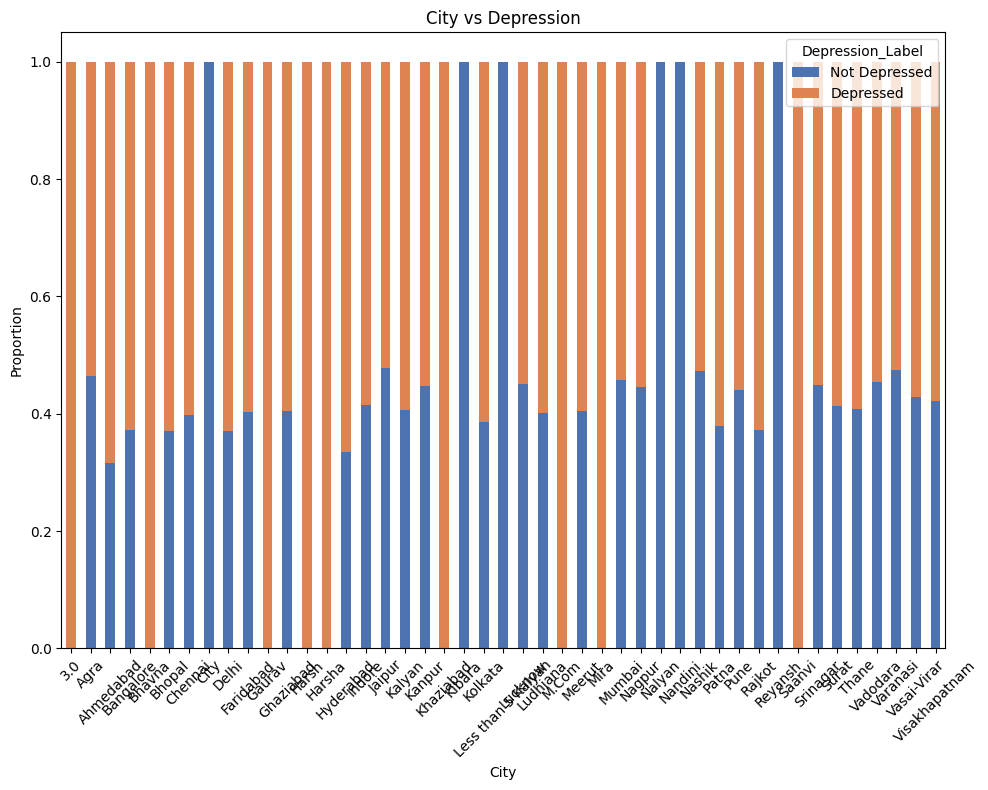

<Figure size 1000x600 with 0 Axes>

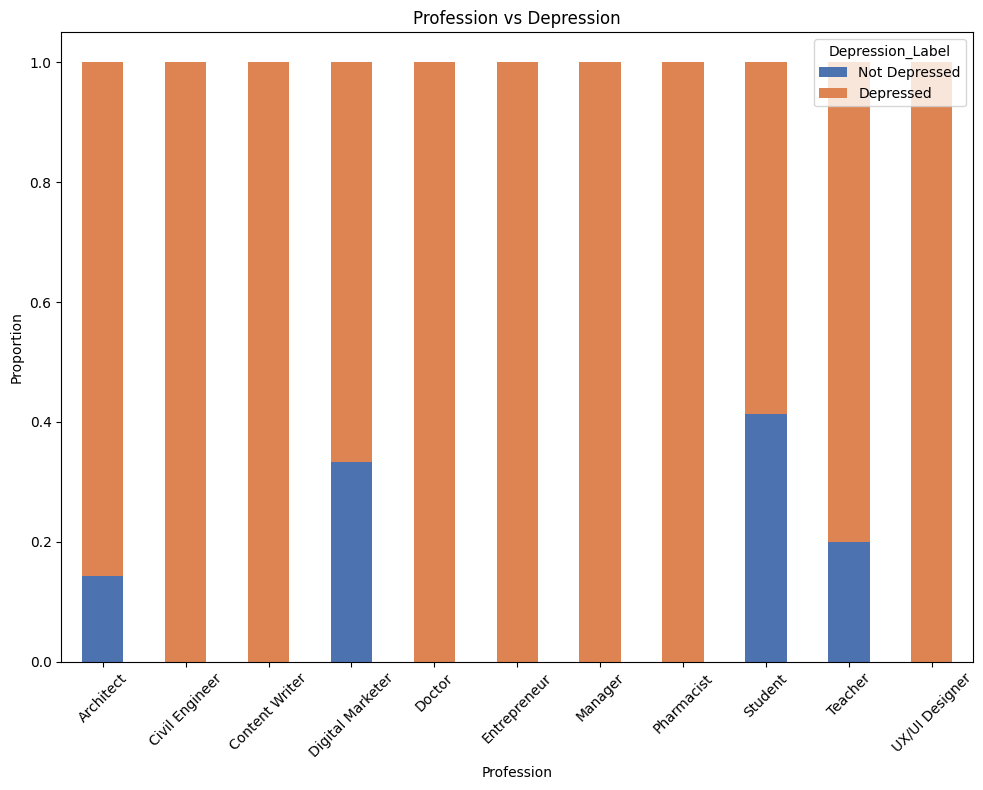

<Figure size 1000x600 with 0 Axes>

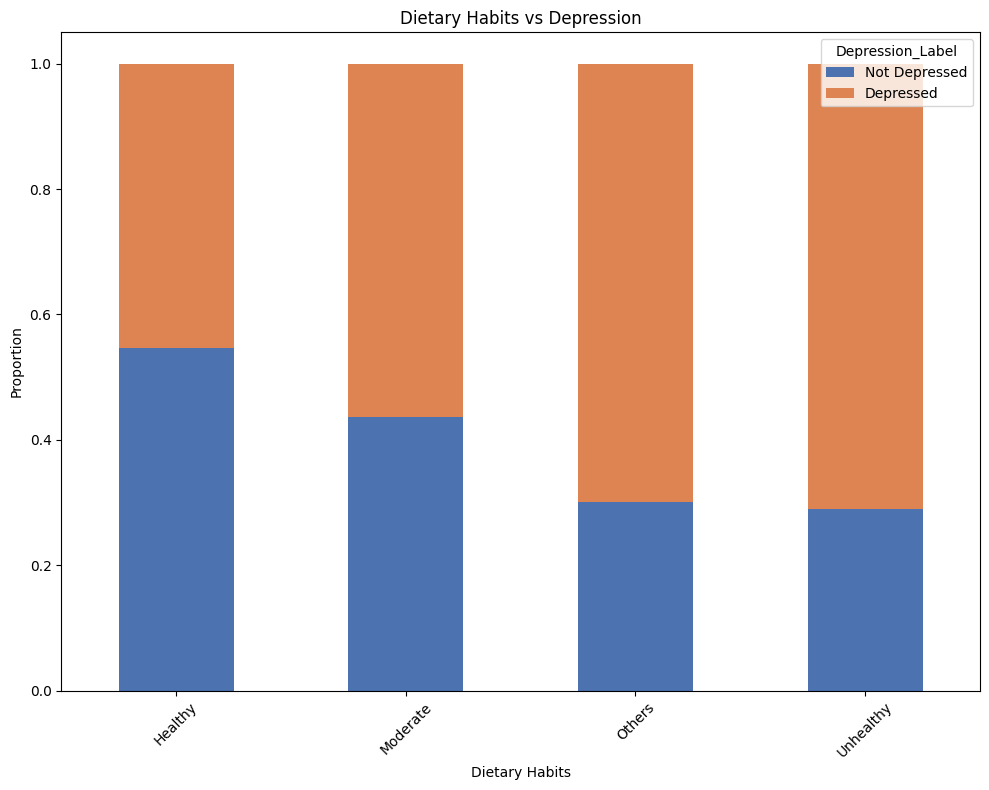

<Figure size 1000x600 with 0 Axes>

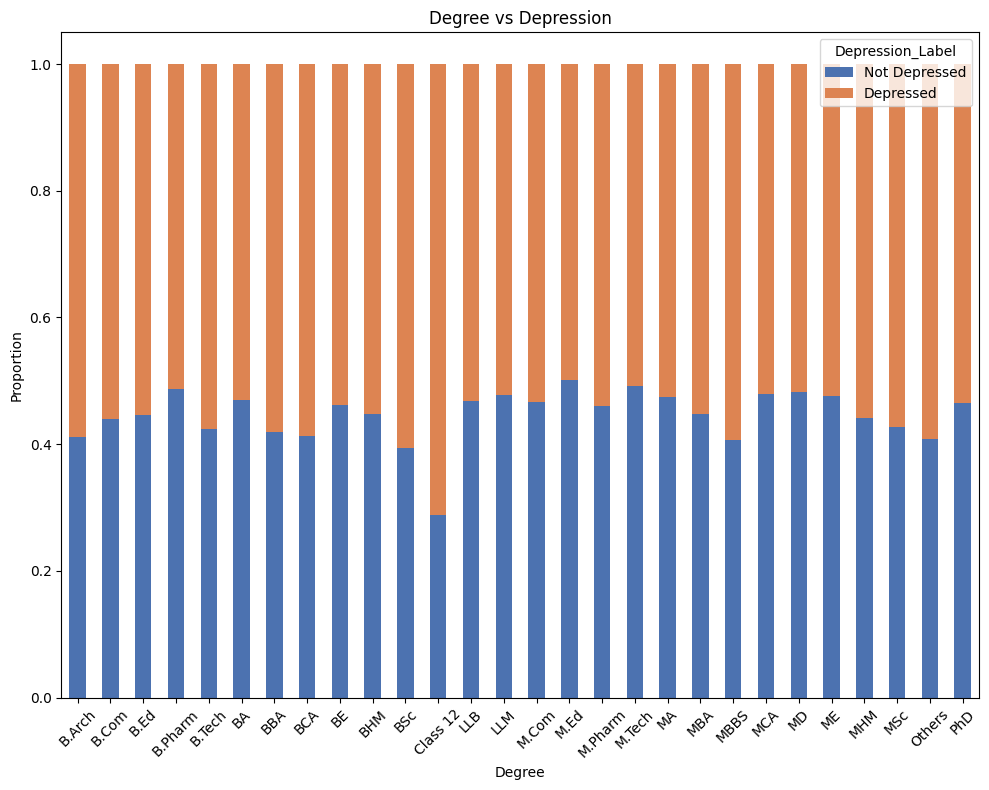

<Figure size 1000x600 with 0 Axes>

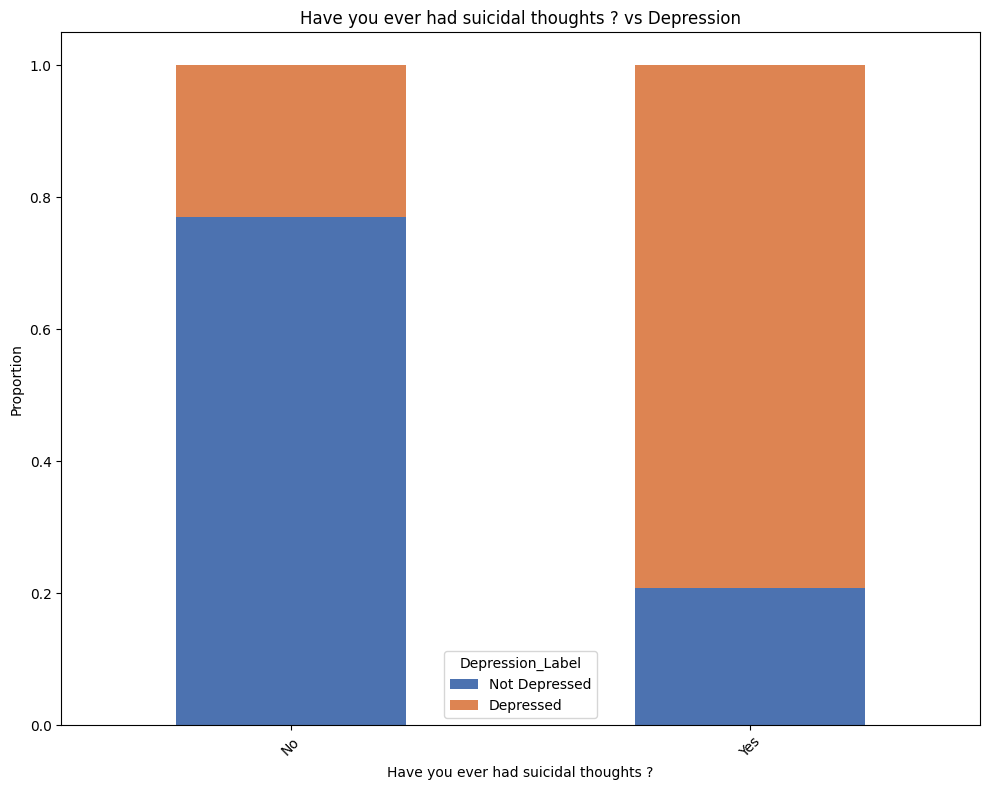

<Figure size 1000x600 with 0 Axes>

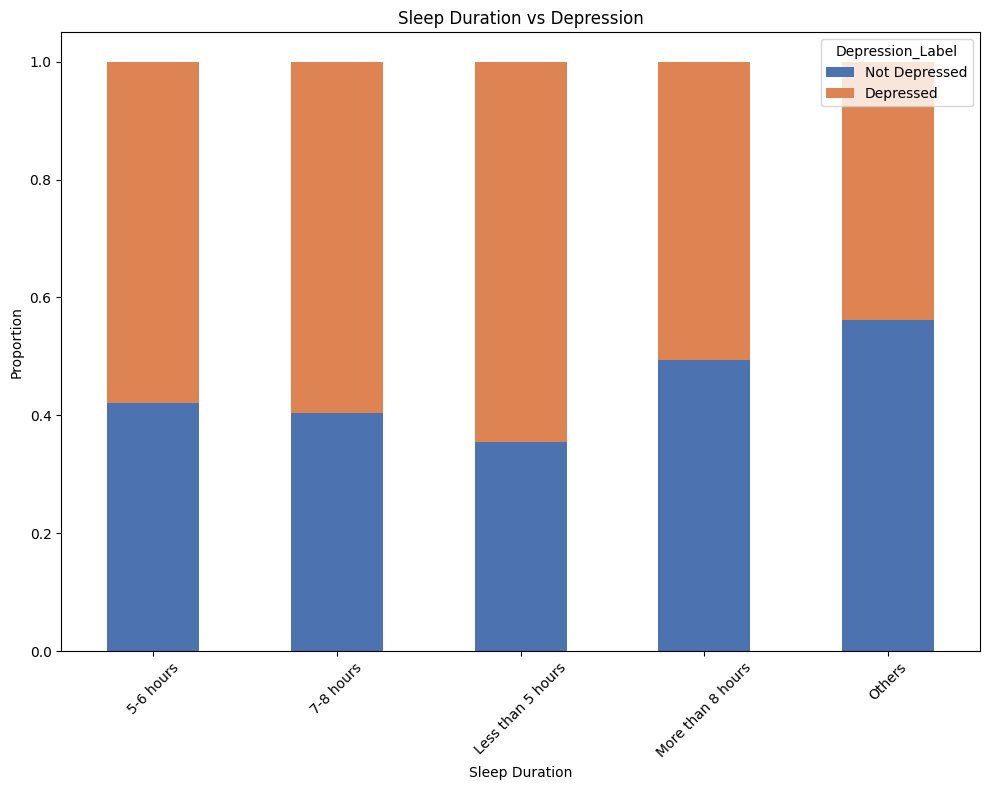

<Figure size 1000x600 with 0 Axes>

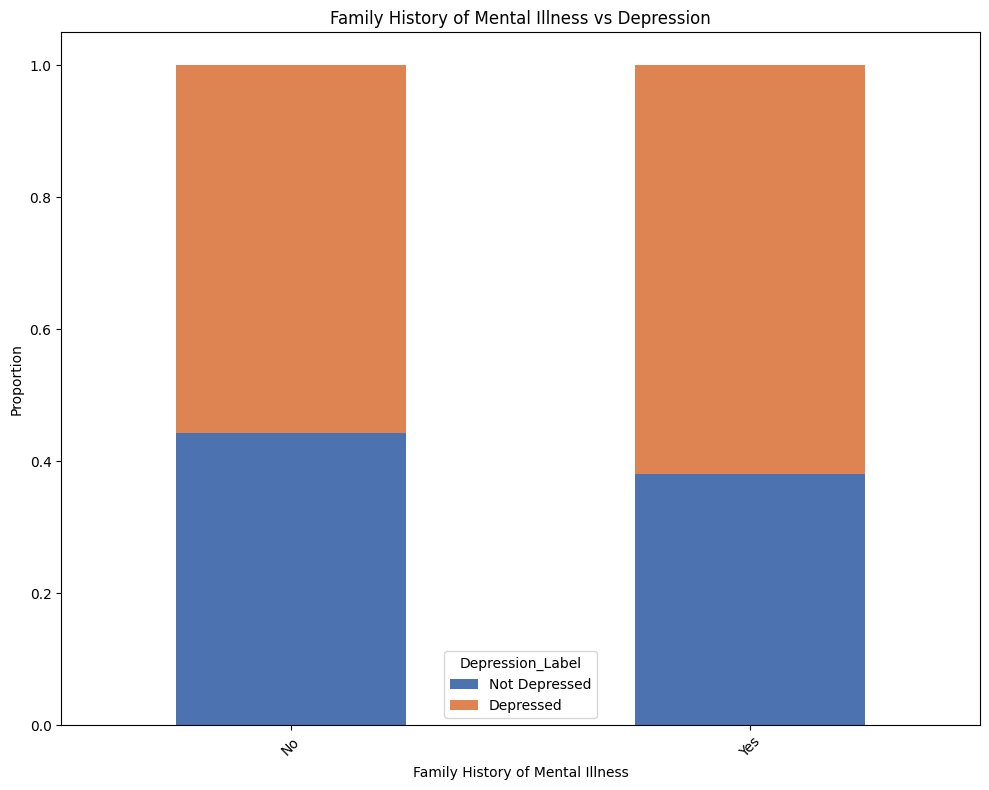

In [22]:
df["Depression_Label"] = df["Depression"].map({0: "Not Depressed", 1: "Depressed"})

bivariate_categorical_target(df, categorical_cols)

In [23]:
def bivariate_numerical_target(df, numerical_cols, target_col="Depression_Label"):
    print("📉 Bivariate Analysis - Numerical vs Target (Depression):")
    for col in numerical_cols:
        plt.figure(figsize=(10, 8))
        sns.boxplot(
            x=target_col,
            y=col,
            data=df,
            palette={"Not Depressed": "#4C72B0", "Depressed": "#DD8452"}  # same colors
        )
        plt.title(f'{col} vs Depression')
        plt.tight_layout()
        plt.show()

📉 Bivariate Analysis - Numerical vs Target (Depression):


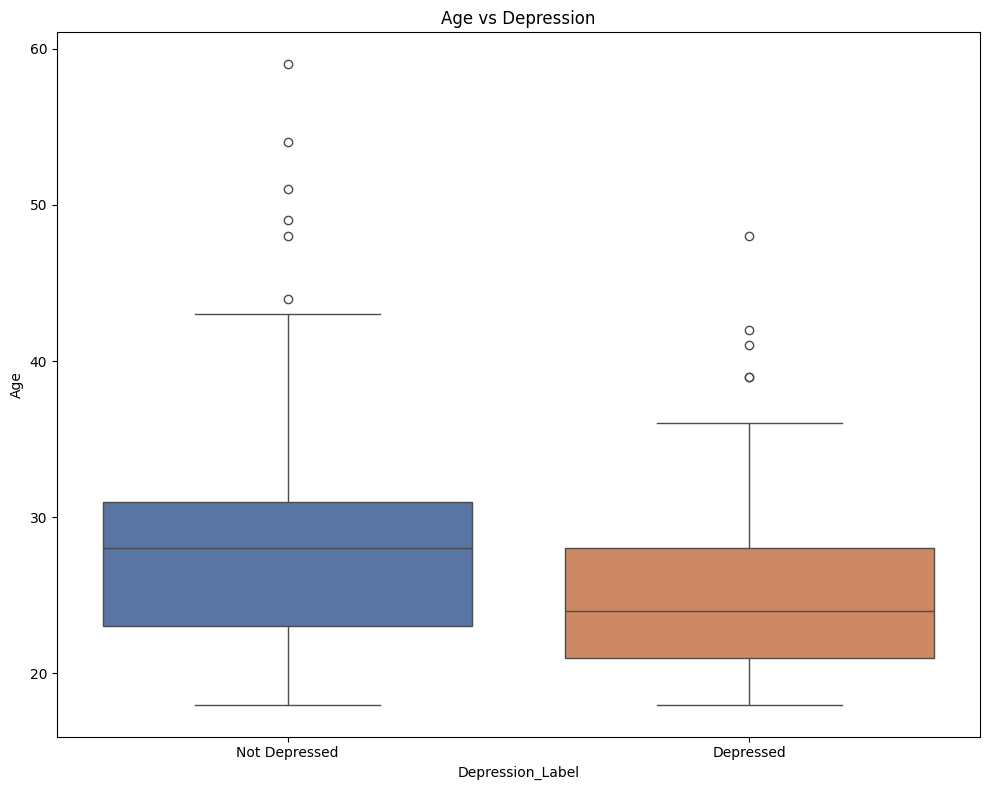

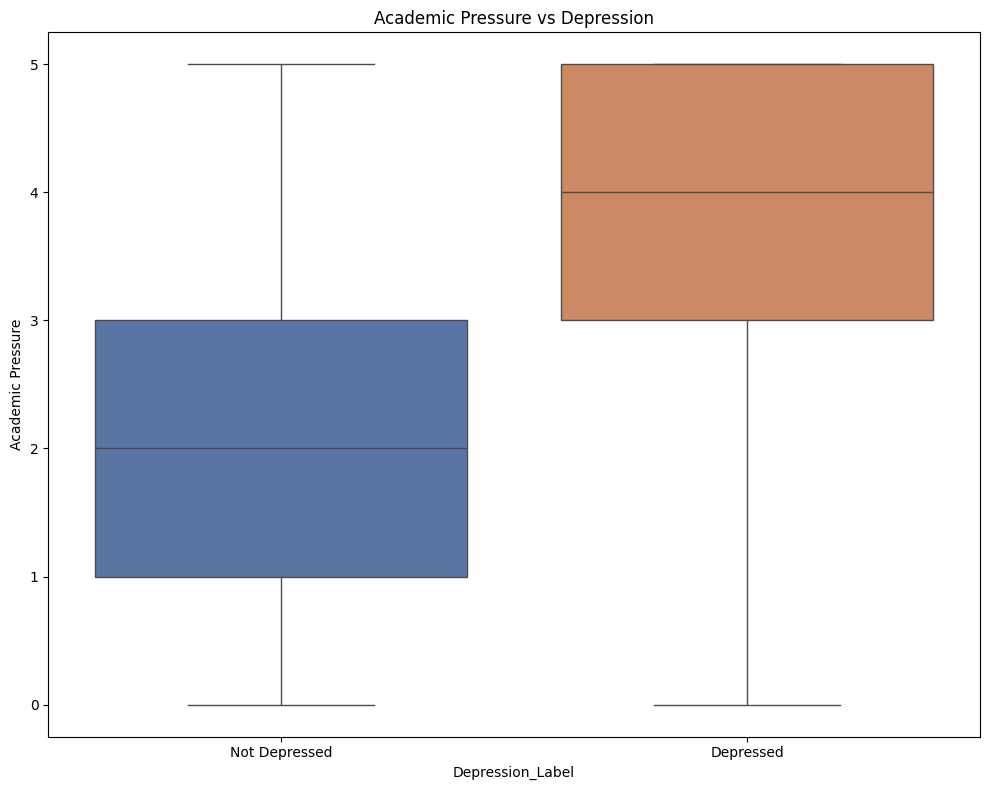

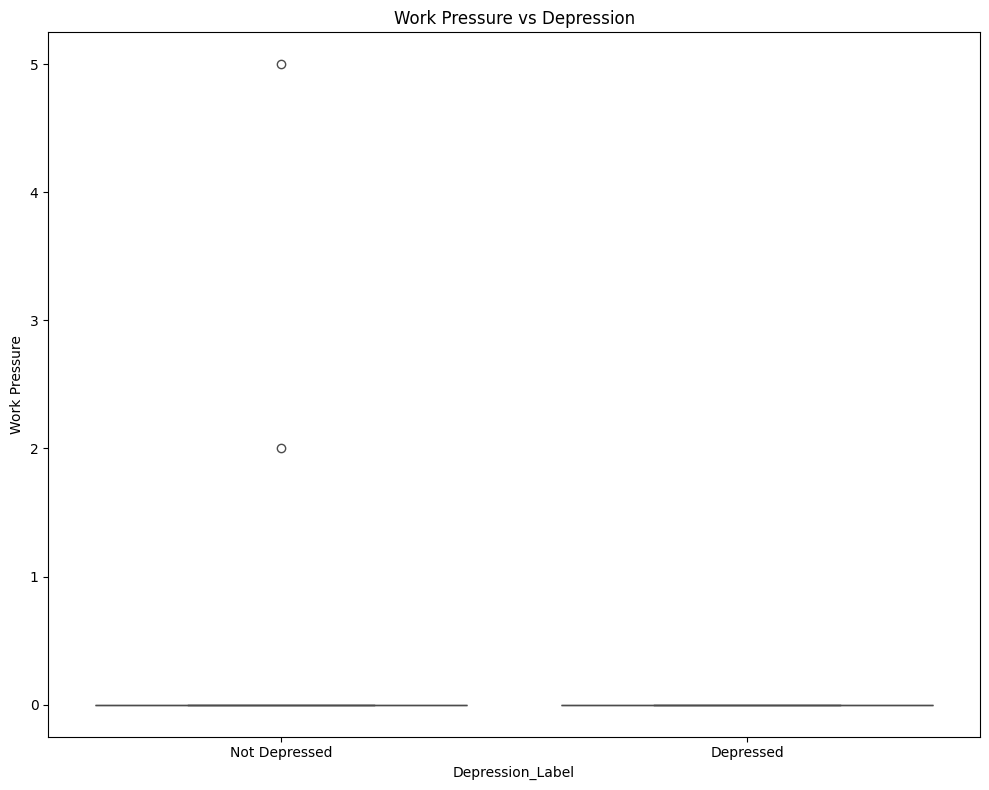

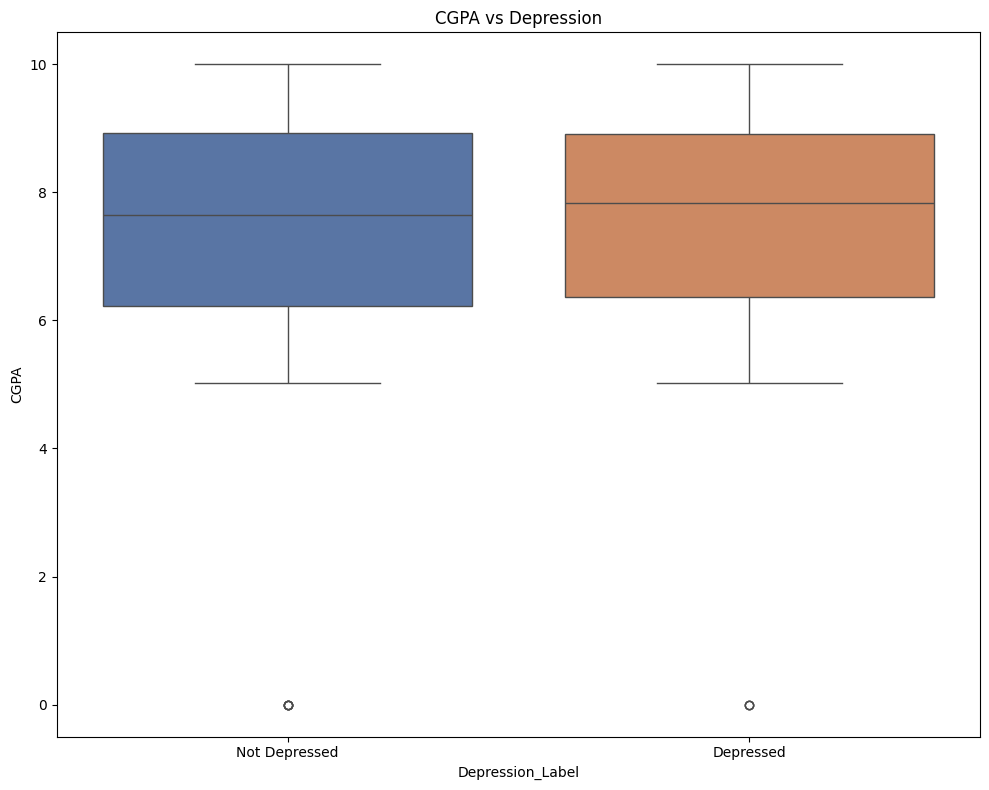

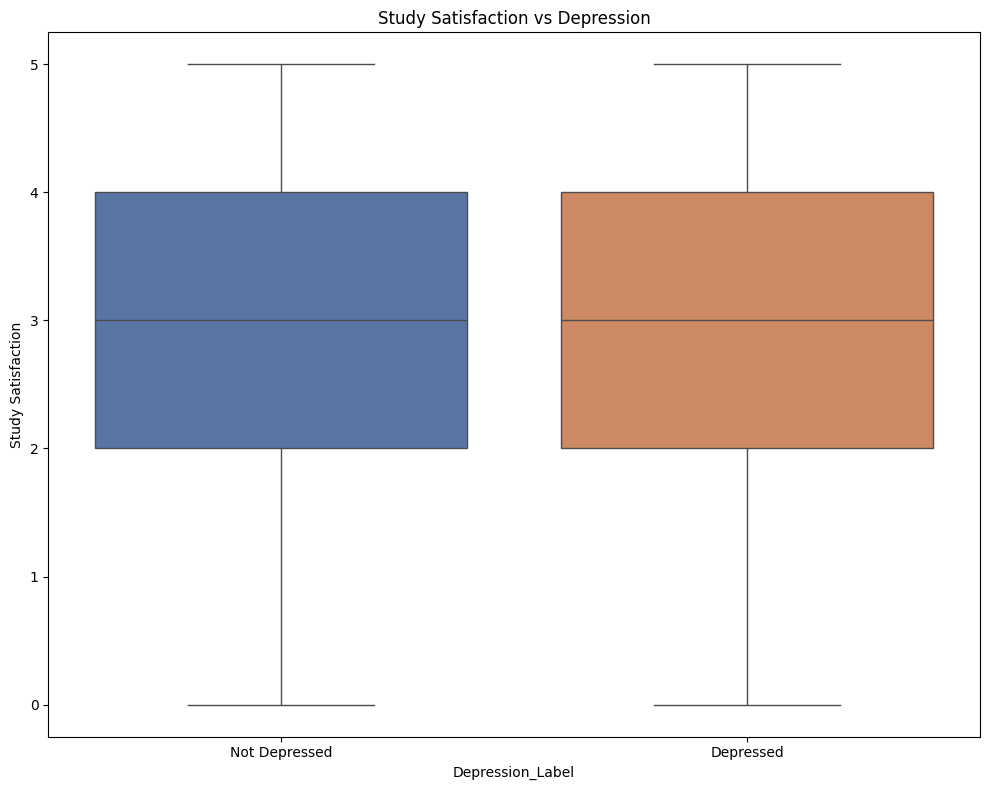

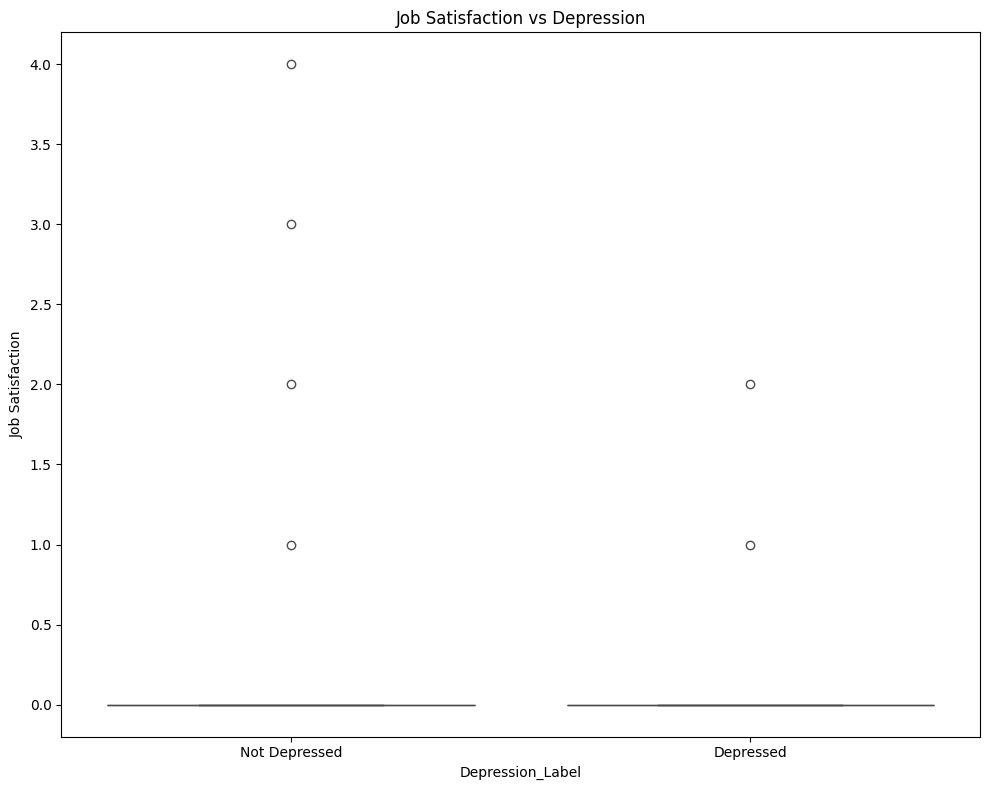

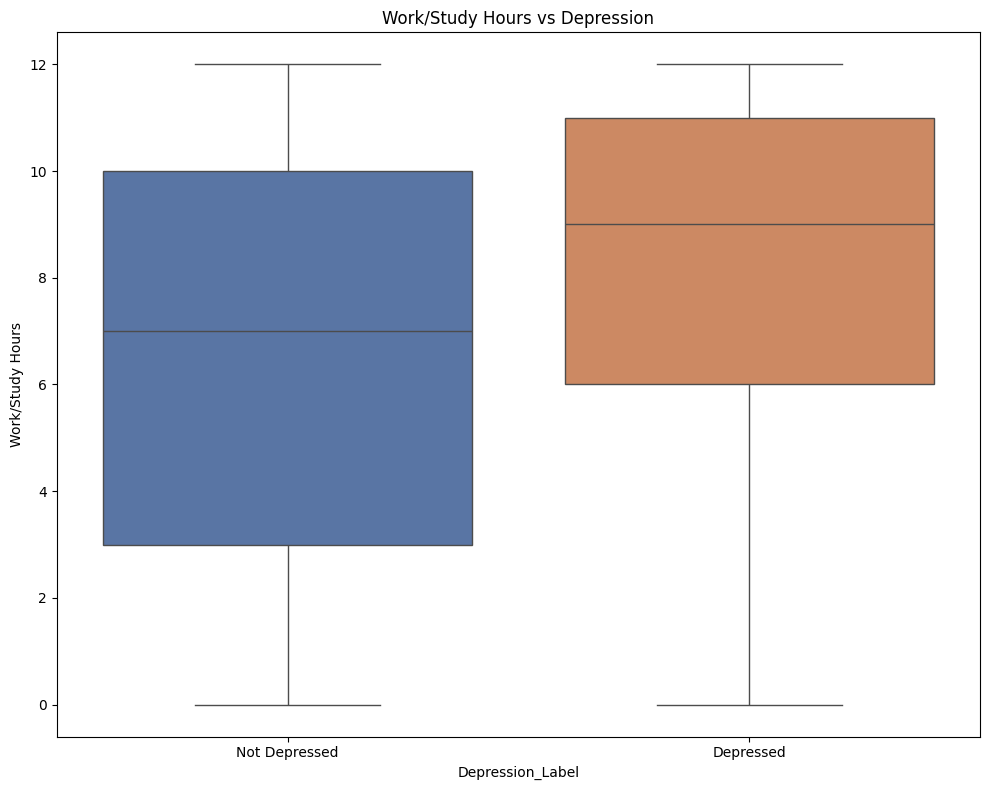

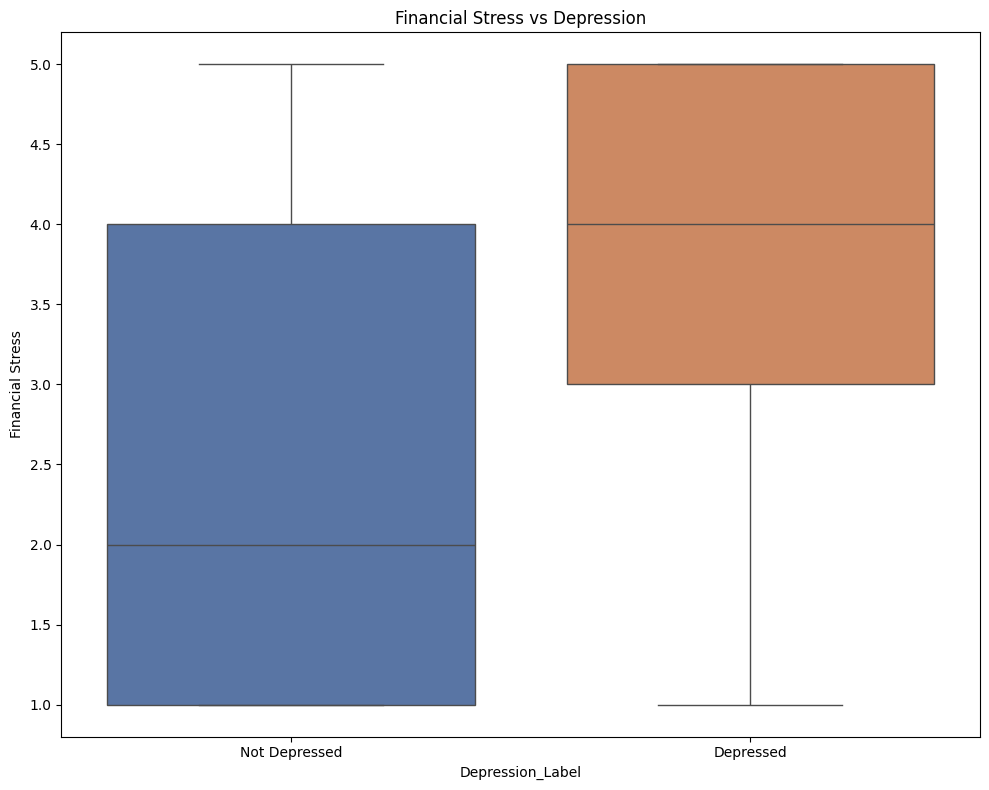

In [39]:
bivariate_numerical_target(df, numerical_cols)

In [24]:
df.shape

(19527, 18)

In [25]:
df.dtypes

Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
Depression_Label                          object
dtype: object

## 3. Drop useless columns

In [44]:
df.drop(columns=['City', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

In [45]:
df.shape

(19527, 13)

In [28]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [29]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,21.0,5.0,5.58,5.0,Less than 5 hours,Unhealthy,BA,No,0.0,4.0,Yes,0
1,Male,18.0,5.0,6.08,4.0,Less than 5 hours,Healthy,Class 12,Yes,7.0,5.0,No,1
2,Male,18.0,4.0,7.77,4.0,5-6 hours,Healthy,Class 12,Yes,11.0,4.0,No,1
3,Male,29.0,3.0,7.48,1.0,More than 8 hours,Moderate,MCA,No,12.0,5.0,Yes,1
4,Male,33.0,4.0,8.52,4.0,7-8 hours,Healthy,B.Tech,Yes,6.0,3.0,No,1


## 4. Label Encoding binary variable

In [46]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical variables
binary_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [33]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## 5. Drop Degree Column

In [51]:
df.drop(columns=['Degree'], axis=1, inplace=True)


## 6. OHE multiclass variable

In [54]:
# One-hot encode multi-class categoricals with int dtype
df = pd.get_dummies(df, 
                      columns=['Sleep Duration', 'Dietary Habits'], 
                      drop_first=True, 
                      dtype=int)  # Ensures int dtype instead of bool

In [55]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,1,21.0,5.0,5.58,5.0,0,0.0,4.0,1,0,0,1,0,0,0,0,1
1,1,18.0,5.0,6.08,4.0,1,7.0,5.0,0,1,0,1,0,0,0,0,0
2,1,18.0,4.0,7.77,4.0,1,11.0,4.0,0,1,0,0,0,0,0,0,0
3,1,29.0,3.0,7.48,1.0,0,12.0,5.0,1,1,0,0,1,0,1,0,0
4,1,33.0,4.0,8.52,4.0,1,6.0,3.0,0,1,1,0,0,0,0,0,0


In [56]:
df.dtypes

Gender                                     int64
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
Sleep Duration_7-8 hours                   int64
Sleep Duration_Less than 5 hours           int64
Sleep Duration_More than 8 hours           int64
Sleep Duration_Others                      int64
Dietary Habits_Moderate                    int64
Dietary Habits_Others                      int64
Dietary Habits_Unhealthy                   int64
dtype: object

In [57]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
       'Sleep Duration_More than 8 hours', 'Sleep Duration_Others',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy'],
      dtype='object')

## 7. Standardization

In [58]:
numerical_cols = ['Age', 'Academic Pressure','CGPA', 'Study Satisfaction','Work/Study Hours', 'Financial Stress']

In [59]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [60]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,1,-0.977645,1.340570,-1.404664,1.514242,0,-1.933174,0.597066,1,0,0,1,0,0,0,0,1
1,1,-1.590410,1.340570,-1.065309,0.778814,1,-0.044573,1.290966,0,1,0,1,0,0,0,0,0
2,1,-1.590410,0.615296,0.081712,0.778814,1,1.034628,0.597066,0,1,0,0,0,0,0,0,0
3,1,0.656394,-0.109978,-0.115114,-1.427468,0,1.304428,1.290966,1,1,0,0,1,0,1,0,0
4,1,1.473414,0.615296,0.590745,0.778814,1,-0.314373,-0.096834,0,1,1,0,0,0,0,0,0


## 8. Model training

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [62]:
X = df.drop('Depression', axis=1)
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [64]:
y_pred = rf_model.predict(X_test)

In [65]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [66]:
accuracy

0.8315412186379928

In [67]:
precision

0.8446683459277917

In [68]:
recall

0.8747826086956522

In [69]:
f1

0.8594617684750107

In [70]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Depressed", "Depressed"]))

Random Forest Performance:
Accuracy: 0.8315
Precision: 0.8447
Recall: 0.8748
F1-Score: 0.8595

Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.81      0.77      0.79      1606
    Depressed       0.84      0.87      0.86      2300

     accuracy                           0.83      3906
    macro avg       0.83      0.82      0.82      3906
 weighted avg       0.83      0.83      0.83      3906



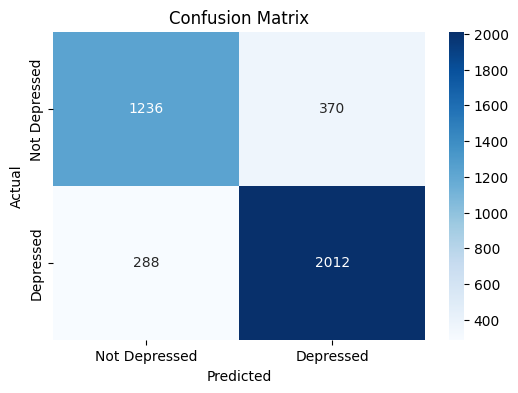

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Depressed", "Depressed"], 
            yticklabels=["Not Depressed", "Depressed"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Step 5: Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))


Top 10 Feature Importances:
Have you ever had suicidal thoughts ?    0.232892
Academic Pressure                        0.168758
CGPA                                     0.118780
Age                                      0.108501
Financial Stress                         0.104868
Work/Study Hours                         0.087215
Study Satisfaction                       0.053492
Dietary Habits_Unhealthy                 0.023630
Gender                                   0.020992
Family History of Mental Illness         0.020297
dtype: float64


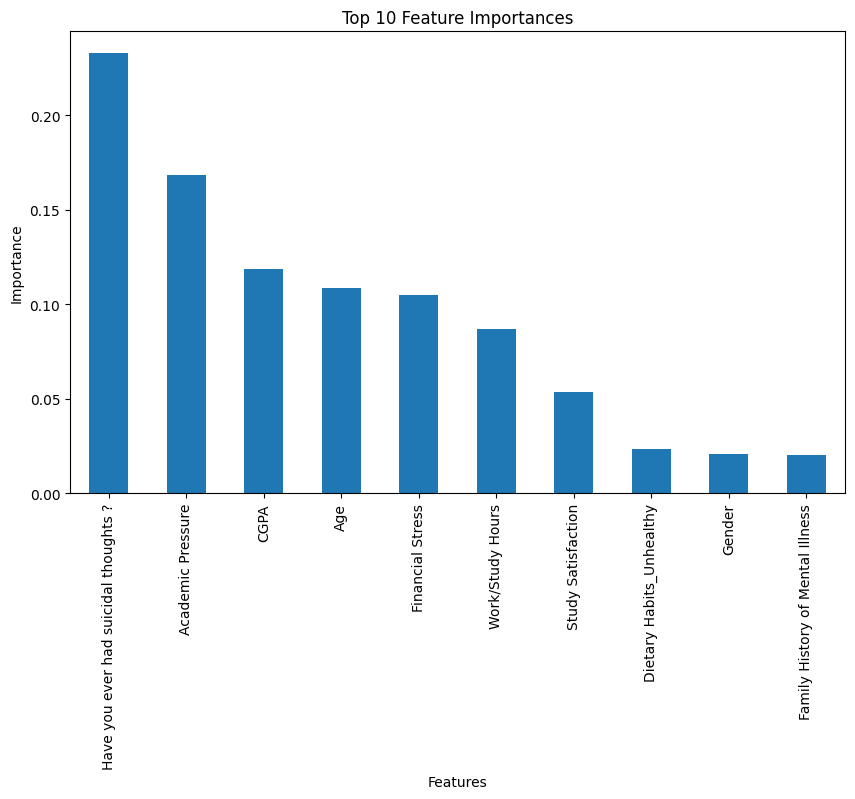

In [73]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [76]:
# Save preprocessed data (optional)
df.to_csv('preprocessed_dataset.csv', index=False)